In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from tashaphyne import normalize
from collections import Counter

from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()

In [2]:
normalize.normalize_searchtext('لقد يخسر الشركــــــــة')

'لقد يخسر الشركه'

In [3]:
print(st.stem('يخسر'))

خسر


In [4]:
df = pd.read_excel('polarity.xlsx')

In [5]:
df

,نص التغريدة,نوع التغريدة,الشركة
0,السهم اغلاقه 32.20 السهم يعتبر فرصة جيد للشراء...,جيد,STC
1,السهم الان اخترق مستوى المقاومة 76.60 الذي بال...,جيد,STC
2,السهم انخفض لاختبار مستوى الدعم 57.98 الذي بال...,جيد,STC
3,يلاحظ بدء ارتفاع ملحوظ في احجام التداول مع تقا...,جيد,STC
4,سهم #stc يعود فوق مستوى 43 اهداف السهم 44-47-49,جيد,STC
...,...,...,...
204,"""بنك الرياض"": المعيار المحاسبي (9) أثر سلبا بـ...",سيء,بنك الرياض
205,"بنك الرياض"" يتوقع انخفاض حقوق المساهمين مابين ...",سيء,بنك الرياض
206,"انخفاض أرباح ""بنك الرياض"" إلى 4715 مليون ريال ...",سيء,بنك الرياض
207,"انخفاض أرباح ""بنك الرياض"" إلى 3835 مليون ريال ...",سيء,بنك الرياض


In [6]:
df.columns = ['tweet','polarity','company']

In [7]:
df

,tweet,polarity,company
0,السهم اغلاقه 32.20 السهم يعتبر فرصة جيد للشراء...,جيد,STC
1,السهم الان اخترق مستوى المقاومة 76.60 الذي بال...,جيد,STC
2,السهم انخفض لاختبار مستوى الدعم 57.98 الذي بال...,جيد,STC
3,يلاحظ بدء ارتفاع ملحوظ في احجام التداول مع تقا...,جيد,STC
4,سهم #stc يعود فوق مستوى 43 اهداف السهم 44-47-49,جيد,STC
...,...,...,...
204,"""بنك الرياض"": المعيار المحاسبي (9) أثر سلبا بـ...",سيء,بنك الرياض
205,"بنك الرياض"" يتوقع انخفاض حقوق المساهمين مابين ...",سيء,بنك الرياض
206,"انخفاض أرباح ""بنك الرياض"" إلى 4715 مليون ريال ...",سيء,بنك الرياض
207,"انخفاض أرباح ""بنك الرياض"" إلى 3835 مليون ريال ...",سيء,بنك الرياض


In [8]:
df['polarity'] = df['polarity'].apply(lambda x: x.strip())

In [9]:
df['polarity'].value_counts()

جيد      142
سيء       53
محايد     14
Name: polarity, dtype: int64

In [10]:
df['polarity'] = df['polarity'].map({'جيد': 1  , 'سيء': 0 , 'محايد':2})

In [11]:
df['polarity'].value_counts()

1    142
0     53
2     14
Name: polarity, dtype: int64

In [12]:
df['tweet']

0      السهم اغلاقه 32.20 السهم يعتبر فرصة جيد للشراء...
1      السهم الان اخترق مستوى المقاومة 76.60 الذي بال...
2      السهم انخفض لاختبار مستوى الدعم 57.98 الذي بال...
3      يلاحظ بدء ارتفاع ملحوظ في احجام التداول مع تقا...
4       سهم #stc يعود فوق مستوى 43 اهداف السهم 44-47-49 
                             ...                        
204    "بنك الرياض": المعيار المحاسبي (9) أثر سلبا بـ...
205    بنك الرياض" يتوقع انخفاض حقوق المساهمين مابين ...
206    انخفاض أرباح "بنك الرياض" إلى 4715 مليون ريال ...
207    انخفاض أرباح "بنك الرياض" إلى 3835 مليون ريال ...
208    انخفاض أرباح "بنك الرياض" إلى 2539 مليون ريال ...
Name: tweet, Length: 209, dtype: object

In [13]:
def clean_text(text):
    text = re.sub(r'[^ء-ي]',' ',text)
    text = normalize.normalize_searchtext(text)
    text = ' '.join([st.stem(word) for word in text.split()])# if word not in stop_words])
    return text

In [14]:
df['cleaned_tweet'] = df['tweet'].apply(clean_text)

In [15]:
df

,tweet,polarity,company,cleaned_tweet
0,السهم اغلاقه 32.20 السهم يعتبر فرصة جيد للشراء...,1,STC,سهم غلق سهم عبر فرص جيد شرء هدف رفع الي ثم الذ...
1,السهم الان اخترق مستوى المقاومة 76.60 الذي بال...,1,STC,سهم الن خرق ستي قام الذي ثبت عله هدف هدف سرع ث...
2,السهم انخفض لاختبار مستوى الدعم 57.98 الذي بال...,1,STC,سهم خفض خبر ستي دعم الذي ثبت عله بدء ردد الي س...
3,يلاحظ بدء ارتفاع ملحوظ في احجام التداول مع تقا...,1,STC,لحظ بدء رفع لحظ في حجم دول مع قطع يجب في ءشر س...
4,سهم #stc يعود فوق مستوى 43 اهداف السهم 44-47-49,1,STC,سهم يعد فوق ستي هدف سهم
...,...,...,...,...
204,"""بنك الرياض"": المعيار المحاسبي (9) أثر سلبا بـ...",0,بنك الرياض,بنك ريض عير حسب اثر سلب ب لير ريل علي حقق سهم
205,"بنك الرياض"" يتوقع انخفاض حقوق المساهمين مابين ...",0,بنك الرياض,بنك ريض وقع خفض حقق سهم ماب و ملي ريل لءه اله ...
206,"انخفاض أرباح ""بنك الرياض"" إلى 4715 مليون ريال ...",0,بنك الرياض,خفض ربح بنك ريض الي ملي ريل بنه عام ربح ربع رب...
207,"انخفاض أرباح ""بنك الرياض"" إلى 3835 مليون ريال ...",0,بنك الرياض,خفض ربح بنك ريض الي ملي ريل بنه تسع شهر اول رب...


In [16]:
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt

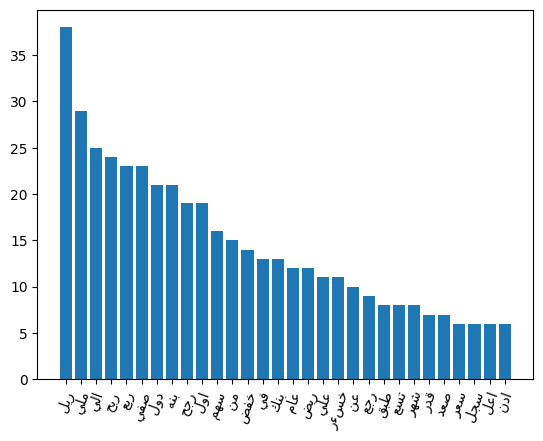

In [17]:
neg = df[df['polarity'] == 0]
neg.reset_index(inplace=True)
neg_text = ''
for row in neg['cleaned_tweet']:
    neg_text = neg_text + ' ' + row
neg_counts = Counter(neg_text.split())
counter_neg = pd.DataFrame(neg_counts.most_common())[:30]
lst = []
for word in counter_neg[0]:
    reshaped_text = arabic_reshaper.reshape(word)
    artext = get_display(reshaped_text)
    lst.append(artext)
plt.xticks(rotation=70)
plt.bar(lst,counter_neg[1])
plt.show()

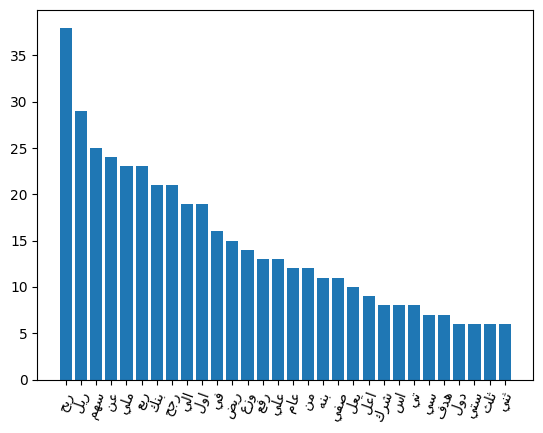

In [18]:
pos = df[df['polarity'] == 1]
pos.reset_index(inplace=True)
pos_text = ''
for row in pos['cleaned_tweet']:
    pos_text = pos_text + ' ' + row
pos_counts = Counter(pos_text.split())
counter_pos = pd.DataFrame(pos_counts.most_common())[:30]
lst = []
for word in counter_pos[0]:
    reshaped_text = arabic_reshaper.reshape(word)
    artext = get_display(reshaped_text)
    lst.append(artext)
plt.xticks(rotation=70)
plt.bar(lst,counter_neg[1])
plt.show()

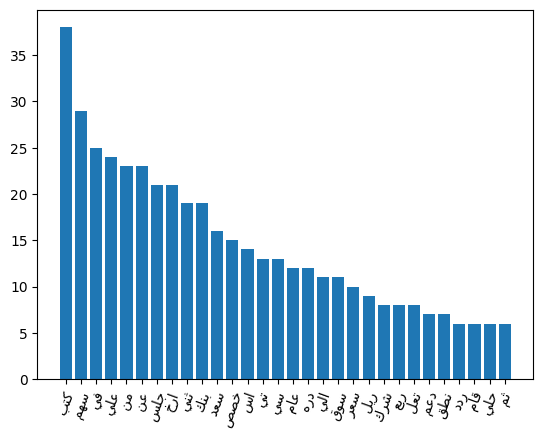

In [19]:
neutral = df[df['polarity'] == 2]
neutral.reset_index(inplace=True)
neutral_text = ''
for row in neutral['cleaned_tweet']:
    neutral_text = neutral_text + ' ' + row
neutral_counts = Counter(neutral_text.split())
counter_neutral= pd.DataFrame(neutral_counts.most_common())[:30]
lst = []
for word in counter_neutral[0]:
    reshaped_text = arabic_reshaper.reshape(word)
    artext = get_display(reshaped_text)
    lst.append(artext)
plt.xticks(rotation=70)
plt.bar(lst,counter_neg[1])
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_tweet'], df['polarity'], test_size=0.3,random_state=8)

In [21]:
tfidf = TfidfVectorizer(ngram_range=(1,1))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [22]:
rf = RandomForestClassifier(random_state=10) #classifier
rf_tfidf = rf.fit(X_train_tfidf, y_train)

train_pred = rf_tfidf.predict(X_train_tfidf)
y_pred = rf_tfidf.predict(X_test_tfidf)

tprecision = precision_score(y_train, train_pred,average='micro')
trecall = recall_score(y_train, train_pred,average='micro')
taccuracy = accuracy_score(y_train, train_pred)

precision = precision_score(y_test, y_pred,average='micro')
recall = recall_score(y_test, y_pred,average='micro')
accuracy = accuracy_score(y_test, y_pred)

print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(tprecision, 3), round(trecall, 3), round(taccuracy, 3)))
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3), round(recall, 3), round(accuracy, 3)))
print('---------------------------------')

Precision: 0.993 / Recall: 0.993 / Accuracy: 0.993
Precision: 0.889 / Recall: 0.889 / Accuracy: 0.889
---------------------------------


In [23]:
neg.iloc[10]['tweet']

'المؤشر الان عند 10,711 بنزول 13 نقطة بضغط من الراجحي'

In [24]:
cleaned = clean_text(neg.iloc[7]['cleaned_tweet'])
#cleaned = clean_text('دائماً وأبداً وقت الصفقات ووقت الفرص يخذل عملائه للأسف \nبإذن الله على الجزيرة كابيتال ')
trans = tfidf.transform([cleaned])
x = rf_tfidf.predict(trans)[0]
if x == 0:
    print("Negative")
elif x == 1:
    print("Positive")
else:
    print('neutral')

Positive


In [25]:
import pickle

In [27]:
pickle.dump(rf_tfidf,open('sentiment.pkl','wb'))

In [29]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))